# Creating Dataset

В данном разделе написан код, который создает датасет из векторных представлений аудиофайлов

In [1]:
import os
import librosa
import numpy as np
import librosa.display
import scipy
from scipy import stats
import pandas as pd
import tqdm


In [2]:
def get_base_features(wav_path:str,num_mfcc:int):
    '''
    данная функция возвращает характеристики аудиофайла в виде вектора 
    и список названий характеристик
    
    ==Input==
    wav_path - путь в аудиофайлу
    num_mfcc - количество мел
    '''
    ff_list = [] # list values
    ff_name_list=[] # list names
    y, sr = librosa.load(wav_path, sr=None)
 
    y_harmonic, y_percussive = librosa.effects.hpss(y) #Decompose an audio time series into harmonic and percussive components.
 
    tempo, beat_frames = librosa.beat.beat_track(y=y_harmonic, sr=sr)
    chroma = librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
    mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=num_mfcc)
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    contrast = librosa.feature.spectral_contrast(y=y_harmonic, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zrate = librosa.feature.zero_crossing_rate(y_harmonic)
 
    chroma_mean = np.mean(chroma, axis=1)
    chroma_std = np.std(chroma, axis=1)
 
    for i in range(0, len(chroma_mean)):
        ff_list.append(chroma_mean[i])
        ff_name_list.append(f'chroma_mean_{i}')
    for i in range(0, len(chroma_std)):
        ff_list.append(chroma_std[i])
        ff_name_list.append(f'chroma_std_{i}')
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)
 
    for i in range(0, len(mfccs_mean)):
        ff_list.append(mfccs_mean[i])
        ff_name_list.append(f'mfccs_mean_{i}')
    for i in range(0, len(mfccs_std)):
        ff_list.append(mfccs_std[i])
        ff_name_list.append(f'mfccs_std_{i}')         
    cent_mean = np.mean(cent)
    cent_std = np.std(cent)
    cent_skew = scipy.stats.skew(cent, axis=1)[0]

 
    contrast_mean = np.mean(contrast,axis=1)
    contrast_std = np.std(contrast,axis=1)
 
    rolloff_mean=np.mean(rolloff)
    rolloff_std=np.std(rolloff)

    data = np.concatenate(([cent_mean, cent_std, cent_skew], 
                           contrast_mean, contrast_std, 
                           [rolloff_mean, rolloff_std, rolloff_std]), axis=0)
    ff_list += list(data)
    ff_name_list+=['cent_mean', 'cent_std', 'cent_skew']
    for i in range(0,len(contrast_mean)):
        ff_name_list.append(f'contrast_mean_{i}')
    for i in range(0,len(contrast_std)):
        ff_name_list.append(f'contrast_std_{i}')
    ff_name_list+=['rolloff_mean', 'rolloff_std', 'rolloff_std']
    
    
    zrate_mean = np.mean(zrate)
    zrate_std = np.std(zrate)
    zrate_skew = scipy.stats.skew(zrate,axis=1)[0]
 
    ff_list += [zrate_mean, zrate_std, zrate_skew]
    ff_name_list+=['zrate_mean', 'zrate_std', 'zrate_skew']
    ff_list.append(tempo)
    ff_name_list.append('tempo')
 
    return ff_list,ff_name_list


def create_csv_dataset(rootdir,num_mfcc):
    '''
    данная функция возвращает датасет по гоаак
    '''
    error_counter = 0
    columns=[]
    data=[]
    file_list=[]
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if file.lower().endswith('.wav'):
                file_list.append(os.path.join(subdir, file))
    for file in tqdm.tqdm(file_list):
        try:
            ff_list,ff_name_list = get_base_features(file,num_mfcc)
            ff_list+=[file.split('/')[-1],file.split('/')[-2]]
            ff_name_list+=['file_name','class']
            data.append(ff_list)
        except:
            error_counter+=1
                #print (os.path.join(subdir, file),subdir.split('/')[-1])
    
    df=pd.DataFrame(data)
    df.columns = ff_name_list
    print(f'error_counter {error_counter}')
    return df
                      


In [3]:
df=create_csv_dataset('./archive/segregated-urban8K-sounds',24)

 16%|█████████████▏                                                                    | 1402/8732 [23:45<2:05:14,  1.03s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=765
  return f(*args, **kwargs)
 17%|██████████████▎                                                                   | 1519/8732 [25:43<1:59:53,  1.00it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=937
  return f(*args, **kwargs)
 20%|████████████████                                                                  | 1717/8732 [29:03<1:58:16,  1.01s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=824
  return f(*args, **kwargs)
 23%|██████████████

 24%|███████████████████▊                                                              | 2115/8732 [36:06<1:59:42,  1.09s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=802
  return f(*args, **kwargs)
 24%|████████████████████                                                              | 2132/8732 [36:25<1:54:58,  1.05s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=889
  return f(*args, **kwargs)
 25%|████████████████████                                                              | 2140/8732 [36:35<2:24:08,  1.31s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=514
  return f(*args, **kwargs)
 25%|██████████████

 26%|█████████████████████▍                                                            | 2277/8732 [39:13<1:48:34,  1.01s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=785
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=393
  return f(*args, **kwargs)
 26%|█████████████████████▍                                                            | 2280/8732 [39:15<1:38:07,  1.10it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=524
  return f(*args, **kwargs)
 26%|█████████████████████▍                                                            | 2282/8732 [39:17<1:39:47,  1.08it/s]/home/toor/Document

 28%|██████████████████████▉                                                           | 2436/8732 [42:10<1:44:58,  1.00s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=837
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=419
  return f(*args, **kwargs)
 28%|██████████████████████▉                                                           | 2446/8732 [42:21<1:57:43,  1.12s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=873
  return f(*args, **kwargs)
 28%|██████████████████████▉                                                           | 2448/8732 [42:25<2:32:07,  1.45s/it]/home/toor/Document

 29%|████████████████████████                                                          | 2563/8732 [44:34<1:58:12,  1.15s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=767
  return f(*args, **kwargs)
 30%|████████████████████████▏                                                         | 2578/8732 [44:52<2:07:20,  1.24s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=582
  return f(*args, **kwargs)
 30%|████████████████████████▎                                                         | 2588/8732 [45:02<1:57:19,  1.15s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=761
  return f(*args, **kwargs)
 30%|██████████████

 31%|█████████████████████████▌                                                        | 2727/8732 [47:33<1:58:00,  1.18s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=775
  return f(*args, **kwargs)
 32%|██████████████████████████                                                        | 2770/8732 [48:24<1:46:56,  1.08s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=528
  return f(*args, **kwargs)
 32%|██████████████████████████                                                        | 2774/8732 [48:27<1:29:28,  1.11it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=904
  return f(*args, **kwargs)
 32%|██████████████

 35%|████████████████████████████▊                                                     | 3066/8732 [53:40<1:32:03,  1.03it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=513
  return f(*args, **kwargs)
 36%|█████████████████████████████                                                     | 3100/8732 [54:13<1:32:34,  1.01it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=731
  return f(*args, **kwargs)
 37%|██████████████████████████████                                                    | 3197/8732 [55:48<1:31:53,  1.00it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=644
  return f(*args, **kwargs)
/home/toor/Document

 43%|██████████████████████████████████▎                                             | 3743/8732 [1:04:34<1:23:46,  1.01s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=522
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=261
  return f(*args, **kwargs)
 43%|██████████████████████████████████▎                                             | 3744/8732 [1:04:34<1:06:13,  1.26it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=817
  return f(*args, **kwargs)
 43%|██████████████████████████████████▌                                             | 3773/8732 [1:05:02<1:17:29,  1.07it/s]/home/toor/Document

 50%|███████████████████████████████████████▊                                        | 4349/8732 [1:15:00<1:12:17,  1.01it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=816
  return f(*args, **kwargs)
 51%|████████████████████████████████████████▍                                       | 4415/8732 [1:16:08<1:13:34,  1.02s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=841
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=421
  return f(*args, **kwargs)
 51%|████████████████████████████████████████▍                                       | 4420/8732 [1:16:13<1:08:42,  1.05it/s]/home/toor/Document

 57%|██████████████████████████████████████████████▍                                   | 4943/8732 [1:25:36<36:06,  1.75it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=969
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=485
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=243
  return f(*args, **kwargs)
 57%|██████████████████████████████████████████████▍                                   | 4947/8732 [1:25:39<42:55,  1.47it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small f

 57%|██████████████████████████████████████████████▋                                   | 4976/8732 [1:25:54<26:45,  2.34it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=565
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=283
  return f(*args, **kwargs)
 57%|██████████████████████████████████████████████▊                                   | 4982/8732 [1:25:57<36:10,  1.73it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=142
  return f(*args, **kwargs)
 57%|██████████████████████████████████████████████▊                                   | 4984/8732 [1:25:58<33:54,  1.84it/s]/home/toor/Document

 57%|███████████████████████████████████████████████▏                                  | 5020/8732 [1:26:19<37:54,  1.63it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=360
  return f(*args, **kwargs)
 58%|███████████████████████████████████████████████▏                                  | 5021/8732 [1:26:20<38:08,  1.62it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=998
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=499
  return f(*args, **kwargs)
 58%|███████████████████████████████████████████████▏                                  | 5022/8732 [1:26:20<35:02,  1.76it/s]/home/toor/Document

 58%|███████████████████████████████████████████████▌                                  | 5065/8732 [1:26:44<31:45,  1.92it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=742
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=371
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=186
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=93
  return f(*args, **kwargs)
 58%|███████████████████████████████████████████████▌               

 58%|███████████████████████████████████████████████▉                                  | 5105/8732 [1:27:08<39:35,  1.53it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=489
  return f(*args, **kwargs)
 58%|███████████████████████████████████████████████▉                                  | 5107/8732 [1:27:09<37:00,  1.63it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=228
  return f(*args, **kwargs)
 59%|████████████████████████████████████████████████                                  | 5112/8732 [1:27:13<44:17,  1.36it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=619
  return f(*args, **kwargs)
/home/toor/Document

 59%|████████████████████████████████████████████████▎                                 | 5151/8732 [1:27:36<39:17,  1.52it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=58
  return f(*args, **kwargs)
 59%|████████████████████████████████████████████████▍                                 | 5153/8732 [1:27:37<32:07,  1.86it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=664
  return f(*args, **kwargs)
 59%|████████████████████████████████████████████████▍                                 | 5154/8732 [1:27:37<32:39,  1.83it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=516
  return f(*args, **kwargs)
 59%|███████████████

 59%|████████████████████████████████████████████████▊                                 | 5193/8732 [1:27:59<32:01,  1.84it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=297
  return f(*args, **kwargs)
 59%|████████████████████████████████████████████████▊                                 | 5194/8732 [1:28:00<28:35,  2.06it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=410
  return f(*args, **kwargs)
 59%|████████████████████████████████████████████████▊                                 | 5195/8732 [1:28:00<28:43,  2.05it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=667
  return f(*args, **kwargs)
/home/toor/Document

 60%|█████████████████████████████████████████████████▍                                | 5262/8732 [1:28:45<39:03,  1.48it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=745
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=373
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=187
  return f(*args, **kwargs)
 60%|█████████████████████████████████████████████████▍                                | 5265/8732 [1:28:47<33:21,  1.73it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small f

 61%|█████████████████████████████████████████████████▉                                | 5321/8732 [1:29:30<55:54,  1.02it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=249
  return f(*args, **kwargs)
 61%|██████████████████████████████████████████████████                                | 5337/8732 [1:29:46<45:41,  1.24it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=710
  return f(*args, **kwargs)
 61%|██████████████████████████████████████████████████▏                               | 5341/8732 [1:29:50<54:06,  1.04it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=223
  return f(*args, **kwargs)
 61%|██████████████

 65%|█████████████████████████████████████████████████████▏                            | 5669/8732 [1:35:43<50:34,  1.01it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=737
  return f(*args, **kwargs)
 65%|████████████████████████████████████████████████████                            | 5677/8732 [1:35:58<1:14:25,  1.46s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=938
  return f(*args, **kwargs)
 65%|█████████████████████████████████████████████████████▎                            | 5680/8732 [1:36:00<47:52,  1.06it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=861
  return f(*args, **kwargs)
 65%|██████████████

 69%|████████████████████████████████████████████████████████▊                         | 6055/8732 [1:42:57<47:19,  1.06s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=159
  return f(*args, **kwargs)
 69%|████████████████████████████████████████████████████████▉                         | 6068/8732 [1:43:10<45:46,  1.03s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=564
  return f(*args, **kwargs)
 70%|█████████████████████████████████████████████████████████▍                        | 6120/8732 [1:44:10<44:35,  1.02s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=986
  return f(*args, **kwargs)
/home/toor/Document

 73%|███████████████████████████████████████████████████████████▍                      | 6335/8732 [1:48:09<32:08,  1.24it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=85
  return f(*args, **kwargs)
 73%|███████████████████████████████████████████████████████████▌                      | 6341/8732 [1:48:12<26:49,  1.49it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=906
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=453
  return f(*args, **kwargs)
 73%|███████████████████████████████████████████████████████████▌                      | 6346/8732 [1:48:16<33:33,  1.19it/s]/home/toor/Documents

 74%|████████████████████████████████████████████████████████████▍                     | 6434/8732 [1:49:20<24:22,  1.57it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=201
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=51
  return f(*args, **kwargs)
 74%|████████████████████████████████████████████████████████████▍                     | 6441/8732 [1:49:26<35:59,  1.06it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=935
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small fo

 75%|█████████████████████████████████████████████████████████████▎                    | 6534/8732 [1:50:36<22:39,  1.62it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=658
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=329
  return f(*args, **kwargs)
 75%|█████████████████████████████████████████████████████████████▍                    | 6537/8732 [1:50:39<28:25,  1.29it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=270
  return f(*args, **kwargs)
 75%|█████████████████████████████████████████████████████████████▍                    | 6540/8732 [1:50:40<23:21,  1.56it/s]/home/toor/Document

 76%|██████████████████████████████████████████████████████████████▎                   | 6632/8732 [1:51:45<27:23,  1.28it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=699
  return f(*args, **kwargs)
/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=175
  return f(*args, **kwargs)
 76%|██████████████████████████████████████████████████████████████▎                   | 6634/8732 [1:51:46<21:19,  1.64it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=602
  return f(*args, **kwargs)
 76%|██████████████████████████████████████████████████████████████▎                   | 6636/8732 [1:51:47<20:46,  1.68it/s]/home/toor/Document

 77%|███████████████████████████████████████████████████████████████▎                  | 6739/8732 [1:53:02<32:29,  1.02it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=895
  return f(*args, **kwargs)
 77%|███████████████████████████████████████████████████████████████▍                  | 6749/8732 [1:53:11<32:04,  1.03it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=701
  return f(*args, **kwargs)
 77%|███████████████████████████████████████████████████████████████▌                  | 6763/8732 [1:53:24<36:27,  1.11s/it]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=512 is too small for input signal of length=478
  return f(*args, **kwargs)
 78%|███████████████

 81%|██████████████████████████████████████████████████████████████████▏               | 7052/8732 [1:57:49<19:36,  1.43it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=695
  return f(*args, **kwargs)
 81%|██████████████████████████████████████████████████████████████████▎               | 7068/8732 [1:58:03<21:34,  1.29it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=536
  return f(*args, **kwargs)
 81%|██████████████████████████████████████████████████████████████████▍               | 7073/8732 [1:58:07<19:50,  1.39it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=811
  return f(*args, **kwargs)
/home/toor/Document

 84%|█████████████████████████████████████████████████████████████████████▏            | 7371/8732 [2:02:39<19:25,  1.17it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=946
  return f(*args, **kwargs)
 85%|█████████████████████████████████████████████████████████████████████▎            | 7383/8732 [2:02:48<14:05,  1.60it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=718
  return f(*args, **kwargs)
 85%|█████████████████████████████████████████████████████████████████████▍            | 7399/8732 [2:03:02<16:56,  1.31it/s]/home/toor/Documents/sound_classification/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=66
  return f(*args, **kwargs)
 85%|███████████████

error_counter 59


In [4]:
df

,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,...,contrast_std_6,rolloff_mean,rolloff_std,rolloff_std,zrate_mean,zrate_std,zrate_skew,tempo,file_name,class
0,0.160178,0.087434,0.076612,0.205929,0.078787,0.029850,0.640094,0.477461,0.191210,0.160386,...,1.785449,3021.576512,762.463218,762.463218,0.020369,0.008860,0.681127,184.570312,21684-9-0-25.wav,street_music
1,0.180332,0.521686,0.059106,0.124694,0.331713,0.012663,0.075240,0.258995,0.534090,0.284265,...,4.769760,3563.310339,2278.092522,2278.092522,0.016469,0.004995,0.997950,98.684211,108357-9-0-27.wav,street_music
2,0.272391,0.346808,0.322446,0.279513,0.291928,0.167728,0.273811,0.139403,0.174556,0.289839,...,2.989766,3210.506963,759.280675,759.280675,0.052873,0.010552,-0.040003,103.359375,149255-9-0-7.wav,street_music
3,0.308298,0.262684,0.260845,0.277269,0.240012,0.188041,0.166879,0.337689,0.317649,0.270028,...,2.063044,3244.348404,564.224411,564.224411,0.047492,0.012587,-0.340356,106.132075,122738-9-0-2.wav,street_music
4,0.064103,0.426156,0.072378,0.322099,0.058009,0.134987,0.210213,0.133737,0.078752,0.028429,...,3.782294,1320.765540,285.559632,285.559632,0.035080,0.006622,-0.451667,258.398438,61790-9-0-10.wav,street_music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8668,0.442879,0.410863,0.268353,0.239847,0.307682,0.253911,0.265125,0.201907,0.182410,0.226158,...,1.731581,4078.014181,288.049124,288.049124,0.028063,0.012523,0.707592,78.302557,100263-2-0-3.wav,children_playing
8669,0.213591,0.182603,0.296357,0.419585,0.420122,0.263116,0.304787,0.286585,0.260687,0.216186,...,1.142443,1979.222074,390.244251,390.244251,0.014251,0.006446,0.921302,114.795918,132855-2-0-41.wav,children_playing
8670,0.307479,0.332568,0.284546,0.273877,0.282082,0.315533,0.257323,0.303576,0.284559,0.226207,...,1.844744,2104.886968,486.542435,486.542435,0.015446,0.009755,0.365388,93.750000,142003-2-0-1.wav,children_playing
8671,0.245434,0.212240,0.265705,0.320783,0.292035,0.270822,0.223377,0.215286,0.305278,0.324455,...,3.002351,5335.490829,1495.428784,1495.428784,0.059083,0.029935,2.625857,143.554688,76221-2-0-1.wav,children_playing


In [5]:
df.to_csv('./out24.csv') 

# EDA (разведывательный анализ характеристик)

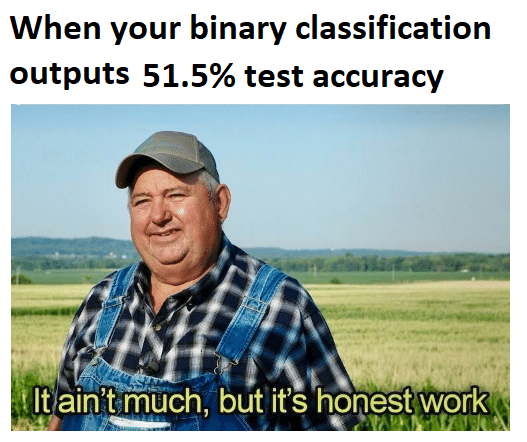

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
df = pd.read_csv('./out24.csv')
df.head()

,Unnamed: 0,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,...,contrast_std_6,rolloff_mean,rolloff_std,rolloff_std.1,zrate_mean,zrate_std,zrate_skew,tempo,file_name,class
0,0,0.160178,0.087434,0.076612,0.205928,0.078787,0.029850,0.640094,0.477461,0.191210,...,1.785449,3021.576512,762.463218,762.463218,0.020369,0.008860,0.681127,184.570312,21684-9-0-25.wav,street_music
1,1,0.180332,0.521686,0.059106,0.124694,0.331713,0.012663,0.075240,0.258995,0.534090,...,4.769760,3563.310339,2278.092522,2278.092522,0.016469,0.004995,0.997950,98.684211,108357-9-0-27.wav,street_music
2,2,0.272391,0.346808,0.322446,0.279513,0.291928,0.167728,0.273811,0.139403,0.174556,...,2.989766,3210.506963,759.280675,759.280675,0.052873,0.010552,-0.040003,103.359375,149255-9-0-7.wav,street_music
3,3,0.308298,0.262684,0.260845,0.277269,0.240012,0.188041,0.166879,0.337689,0.317649,...,2.063044,3244.348404,564.224411,564.224411,0.047492,0.012587,-0.340356,106.132075,122738-9-0-2.wav,street_music
4,4,0.064103,0.426156,0.072378,0.322099,0.058009,0.134987,0.210213,0.133737,0.078752,...,3.782294,1320.765540,285.559632,285.559632,0.035080,0.006622,-0.451667,258.398438,61790-9-0-10.wav,street_music


<AxesSubplot:xlabel='class', ylabel='count'>

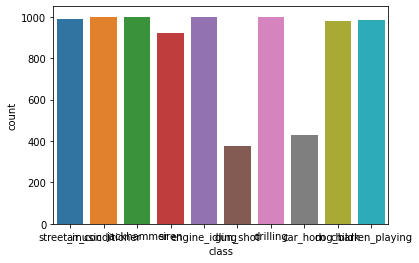

In [10]:
sns.countplot(x = 'class', data=df)
# как распределены классы

In [11]:
classes = list(df['class'].unique()) # получаем список классов
classes

['street_music',
 'air_conditioner',
 'jackhammer',
 'siren',
 'engine_idling',
 'gun_shot',
 'drilling',
 'car_horn',
 'dog_bark',
 'children_playing']

In [12]:
# создаем 2 словаря, для сопоставления индекс-название классов
int_to_class = {i: classes[i] for i in range(0, len(classes))}
class_to_int = {classes[i]:i  for i in range(0, len(classes))}
print(class_to_int)
print(int_to_class)

{'street_music': 0, 'air_conditioner': 1, 'jackhammer': 2, 'siren': 3, 'engine_idling': 4, 'gun_shot': 5, 'drilling': 6, 'car_horn': 7, 'dog_bark': 8, 'children_playing': 9}
{0: 'street_music', 1: 'air_conditioner', 2: 'jackhammer', 3: 'siren', 4: 'engine_idling', 5: 'gun_shot', 6: 'drilling', 7: 'car_horn', 8: 'dog_bark', 9: 'children_playing'}


In [13]:
# кодируем классы в индексы
df['class']=df['class'].apply(lambda x: class_to_int[x])
df['class']

0       0
1       0
2       0
3       0
4       0
       ..
8668    9
8669    9
8670    9
8671    9
8672    9
Name: class, Length: 8673, dtype: int64

In [15]:
df.info() # визуально осматриваем что пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8673 entries, 0 to 8672
Data columns (total 99 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       8673 non-null   int64  
 1   chroma_mean_0    8673 non-null   float64
 2   chroma_mean_1    8673 non-null   float64
 3   chroma_mean_2    8673 non-null   float64
 4   chroma_mean_3    8673 non-null   float64
 5   chroma_mean_4    8673 non-null   float64
 6   chroma_mean_5    8673 non-null   float64
 7   chroma_mean_6    8673 non-null   float64
 8   chroma_mean_7    8673 non-null   float64
 9   chroma_mean_8    8673 non-null   float64
 10  chroma_mean_9    8673 non-null   float64
 11  chroma_mean_10   8673 non-null   float64
 12  chroma_mean_11   8673 non-null   float64
 13  chroma_std_0     8673 non-null   float64
 14  chroma_std_1     8673 non-null   float64
 15  chroma_std_2     8673 non-null   float64
 16  chroma_std_3     8673 non-null   float64
 17  chroma_std_4  

In [16]:
# разбиваем на 2 матрицы, где Х - матрица в которой характеристики аудиофайлов
# у - метки объектов
X = df.iloc[:, 1:-2].values
y = df.iloc[:, -1].values

In [17]:
X

array([[ 1.60178300e-01,  8.74335200e-02,  7.66123100e-02, ...,
         8.85986362e-03,  6.81127491e-01,  1.84570312e+02],
       [ 1.80331780e-01,  5.21685960e-01,  5.91060970e-02, ...,
         4.99504352e-03,  9.97950132e-01,  9.86842105e+01],
       [ 2.72390720e-01,  3.46808100e-01,  3.22446140e-01, ...,
         1.05516232e-02, -4.00034360e-02,  1.03359375e+02],
       ...,
       [ 3.07479200e-01,  3.32568300e-01,  2.84546230e-01, ...,
         9.75533941e-03,  3.65388000e-01,  9.37500000e+01],
       [ 2.45434210e-01,  2.12240440e-01,  2.65704960e-01, ...,
         2.99347568e-02,  2.62585694e+00,  1.43554688e+02],
       [ 2.07121700e-01,  2.88680430e-01,  3.02131180e-01, ...,
         1.25752824e-02,  8.81201936e-01,  1.08173077e+02]])

In [18]:
# Наши матрицы Х,у разбиваем на 4 матрицы. 2 матрицы идут для тренировки, 2 для валидации
#соотношение трейна к валидации 0.8 к 0.2
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=69)

In [19]:
X_train

array([[ 8.71627700e-02,  1.57749330e-01,  2.04489590e-01, ...,
         1.59187340e-02, -1.54436445e+00,  3.03998162e+02],
       [ 5.20788430e-02,  2.41108610e-02,  2.92252630e-01, ...,
         3.34678172e-03, -1.45281396e-01,  1.20185320e+02],
       [ 3.44100830e-01,  2.61768000e-01,  2.87158070e-01, ...,
         6.51258710e-02,  2.41181343e-01,  8.47207992e+01],
       ...,
       [ 3.05758660e-01,  3.55816840e-01,  3.98677440e-01, ...,
         1.68103305e-02,  1.50852660e+00,  1.26048018e+02],
       [ 2.14974720e-01,  2.51151350e-01,  1.20865665e-01, ...,
         6.08356002e-03,  4.08951728e-02,  1.35999178e+02],
       [ 2.63899270e-01,  3.55972260e-01,  3.66430700e-01, ...,
         5.68650524e-03,  8.32274107e-01,  6.38020833e+01]])

In [21]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), 
                                  torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), 
                                torch.from_numpy(y_val).long())

In [22]:
BATCH_SIZE = 16
LEARNING_RATE = 0.0007
NUM_FEATURES = X.shape[1]
NUM_CLASSES = 10

In [23]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)

## Создание сети

Дальше несколько вариантов архитектуры нейронной сети. При каждой архитектуре записаны ее показатели качества. За ненадобностью ячейки с неиспользуемыми архитектурами переведены в тип "заметок"


class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x
    
'''
Epoch 071: | Train Loss: 0.24225 | Val Loss: 0.55195 | Train Acc: 91.825| Val Acc: 83.458
Result increased. best_loss: 0.4029-->0.4029. Saving weights
'''

class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 256)
        self.layer_3 = nn.Linear(256, 128)
        self.layer_4 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(256)
        self.batchnorm3 = nn.BatchNorm1d(128)
        self.batchnorm4 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_4(x)
        x = self.batchnorm4(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

    
'''Result increased. best_loss: 0.4004-->0.4004. Saving weights
Epoch 061: | Train Loss: 0.24447 | Val Loss: 0.40041 | Train Acc: 91.426| Val Acc: 87.493  '''  

In [24]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 1024)
        self.layer_2 = nn.Linear(1024, 512)
        self.layer_3 = nn.Linear(512, 256)
        self.layer_4 = nn.Linear(256, 128)
        self.layer_5 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(1024)
        self.batchnorm2 = nn.BatchNorm1d(512)
        self.batchnorm3 = nn.BatchNorm1d(256)
        self.batchnorm4 = nn.BatchNorm1d(128)
        self.batchnorm5 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_4(x)
        x = self.batchnorm4(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_5(x)
        x = self.batchnorm5(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x
    
    '''Result increased. best_loss: 0.4225-->0.4225. Saving weights
Epoch 067: | Train Loss: 0.15478 | Val Loss: 0.42248 | Train Acc: 94.894| Val Acc: 87.435 on out dataset'''

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [26]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=96, out_features=1024, bias=True)
  (layer_2): Linear(in_features=1024, out_features=512, bias=True)
  (layer_3): Linear(in_features=512, out_features=256, bias=True)
  (layer_4): Linear(in_features=256, out_features=128, bias=True)
  (layer_5): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [27]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [28]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [29]:
print("Begin training.")
best_loss = math.inf
best_weights = './best_big1.pt'
torch.save(model.state_dict(), best_weights)
worse_epoch_counter = 0
max_bad_epoch = 25
train = True
e=0
while train:
    start = time.time(
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
    
    end = time.time()
    if val_epoch_loss/len(val_loader) < best_loss:
        best_loss = val_epoch_loss/len(val_loader)
        print(f'Result increased. best_loss: {round(best_loss,4)}-->{round(val_epoch_loss/len(val_loader),4)}. Saving weights')
        torch.save(model.state_dict(), best_weights)
        worse_epoch_counter=0
    else:
        worse_epoch_counter+=1
        print(f'Result decreased')
    if worse_epoch_counter>= max_bad_epoch:
        train = False
    e+=1
    
    print(f'Epoch {e+0:03} - Epoch Time {int(end-start)} | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')
print(f'Result didnt increased since {max_bad_epoch} epochs. Stop Training.')    

Begin training.
Result increased. best_loss: 1.6086-->1.6086. Saving weights
Epoch 001: | Train Loss: 1.89725 | Val Loss: 1.60865 | Train Acc: 30.673| Val Acc: 45.014
Result increased. best_loss: 1.2982-->1.2982. Saving weights
Epoch 002: | Train Loss: 1.55597 | Val Loss: 1.29820 | Train Acc: 43.795| Val Acc: 56.311
Result increased. best_loss: 1.1395-->1.1395. Saving weights
Epoch 003: | Train Loss: 1.36040 | Val Loss: 1.13948 | Train Acc: 51.240| Val Acc: 62.190
Result increased. best_loss: 1.0745-->1.0745. Saving weights
Epoch 004: | Train Loss: 1.22289 | Val Loss: 1.07446 | Train Acc: 57.016| Val Acc: 62.363
Result increased. best_loss: 1.0454-->1.0454. Saving weights
Epoch 005: | Train Loss: 1.13807 | Val Loss: 1.04537 | Train Acc: 60.281| Val Acc: 64.957
Result increased. best_loss: 0.8952-->0.8952. Saving weights
Epoch 006: | Train Loss: 1.06792 | Val Loss: 0.89523 | Train Acc: 63.044| Val Acc: 71.066
Result increased. best_loss: 0.8132-->0.8132. Saving weights
Epoch 007: | Trai

KeyboardInterrupt: 

In [ ]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=
                                        ['index']).rename(columns={"index":"epochs"})

train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=
                                        ['index']).rename(columns={"index":"epochs"})# Plot the dataframes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",
             ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable",
             ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [ ]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in val_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
print(classification_report(y_val, y_pred_list))

In [187]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_list)).rename(columns=idx2class, index=idx2class)
sns.heatmap(confusion_matrix_df, annot=True)

ValueError: Found input variables with inconsistent numbers of samples: [500, 1735]

# infer